# Zomato Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Top Data of Dataset

In [22]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Top Data of Dataset

In [23]:
dataframe.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


## Converting the Data Type of The “rate” Column to Float and Removing The Denominator.

In [24]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Getting Information of Dataset and Checking The Null Values.

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#### Note :- There is No Null Value in Dataframe

## Exploring the 'listed_in (type)' Column.

Text(0.5, 0, 'Type of restaurant')

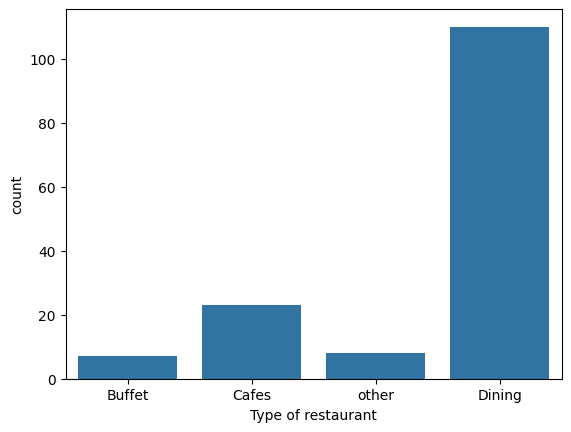

In [5]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

#### Conclusion :- The Majority of The Restaurants Fall into The Dining Category.

## Restaurant Preference

Text(0, 0.5, 'Votes')

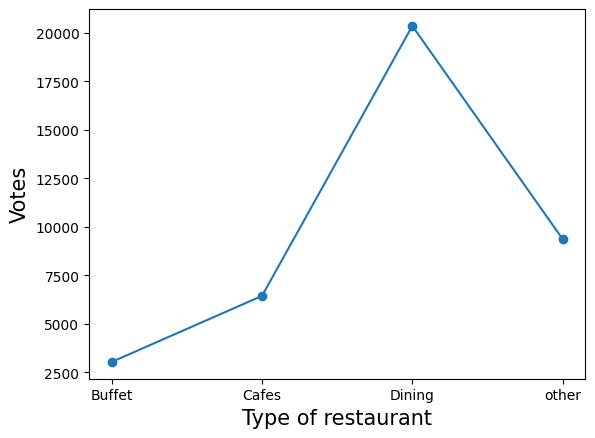

In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,marker="o")
plt.xlabel("Type of restaurant",size=15)
plt.ylabel("Votes",size=15)

#### Conclusion :- Dining Restaurants are Preferred by a Larger Number of Individuals.

## Restaurant’s Name That Received The Maximum Votes.

In [27]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
restaurant_with_max_votes = pd.DataFrame(restaurant_with_max_votes)
 
print("Restaurant(s) with the maximum votes:")
restaurant_with_max_votes

Restaurant(s) with the maximum votes:


,name
38,Empire Restaurant


## Let’s Explore the 'rate' Column.

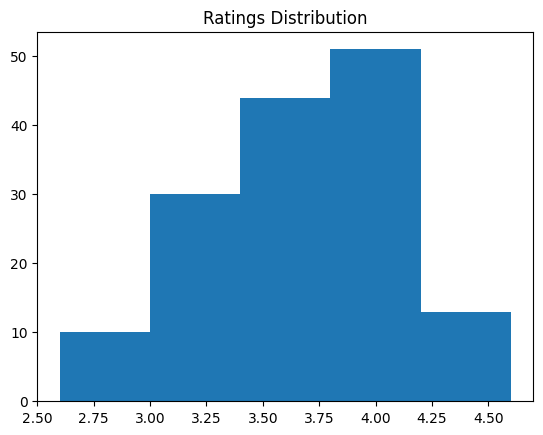

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

#### Conclusion :- The Majority of Restaurants Received Ratings Ranging From 3.5 to 4.

## Analysing Approx Cost

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

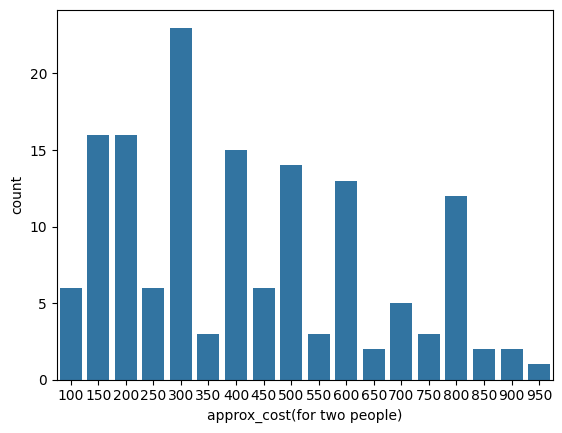

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

#### Conclusion :- The Majority of Couples Prefer Restaurants With an Approximate Cost of 300 Rupees.

##  Let's Examine Whether Online Orders Receive Higher Ratings than Offline Orders.

<Axes: xlabel='online_order', ylabel='rate'>

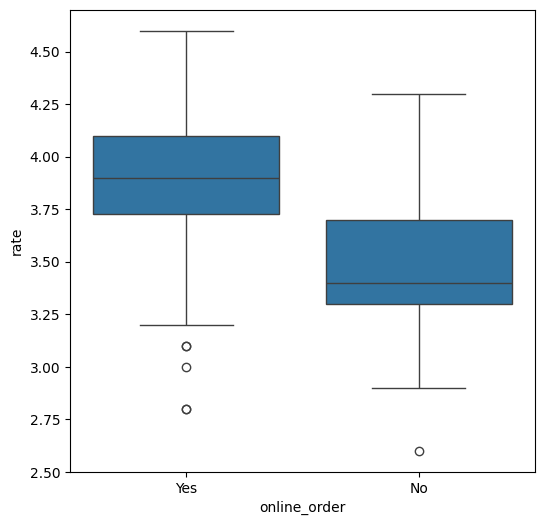

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

#### Conclusion :- Offline Orders Received Lower Ratings in Comparison to Online Orders, which Obtained Excellent Ratings.

## Comparing Online and Offline Ordering Preferences Between Dining Restaurants and Cafes.

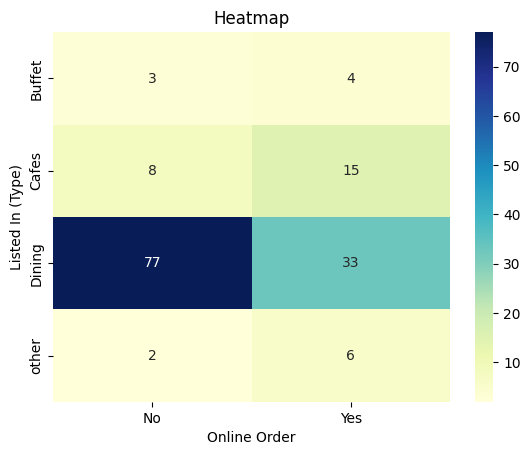

In [16]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#### Conclusion :- Dining Restaurants Primarily Accept Offline Orders, Whereas Cafes Primarily Receive Online Orders. This Suggests that Clients Prefer to Place Orders in Person at Restaurants, But Prefer Online Ordering at Cafes.